# Convolutional Neural Network With VGG19 Base

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Expand-max-rows,-columns,-width" data-toc-modified-id="Expand-max-rows,-columns,-width-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Expand max rows, columns, width</a></span></li><li><span><a href="#Configure-OS-to-reduce-messages" data-toc-modified-id="Configure-OS-to-reduce-messages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Configure OS to reduce messages</a></span></li></ul></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Assign-all-data-to-train,-validation,-and-test" data-toc-modified-id="Assign-all-data-to-train,-validation,-and-test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Assign all data to train, validation, and test</a></span></li><li><span><a href="#Get-images-&amp;-labels-assigned-to-variables" data-toc-modified-id="Get-images-&amp;-labels-assigned-to-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get images &amp; labels assigned to variables</a></span></li><li><span><a href="#Create-Keras-&quot;Callbacks&quot;-To-Customize-Training-+-Output" data-toc-modified-id="Create-Keras-&quot;Callbacks&quot;-To-Customize-Training-+-Output-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Keras "Callbacks" To Customize Training + Output</a></span></li></ul></li><li><span><a href="#Build-The-CNN" data-toc-modified-id="Build-The-CNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build The CNN</a></span><ul class="toc-item"><li><span><a href="#Load-Pre-Trained-Model" data-toc-modified-id="Load-Pre-Trained-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load Pre-Trained Model</a></span></li><li><span><a href="#Build-Model-On-Top-Of-Pre-Trained-Model" data-toc-modified-id="Build-Model-On-Top-Of-Pre-Trained-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Build Model On Top Of Pre-Trained Model</a></span></li></ul></li><li><span><a href="#Freezing-The-Base" data-toc-modified-id="Freezing-The-Base-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Freezing The Base</a></span><ul class="toc-item"><li><span><a href="#Examine-Layers-Of-CNN" data-toc-modified-id="Examine-Layers-Of-CNN-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Examine Layers Of CNN</a></span></li><li><span><a href="#Freeze-Base-CNN-model" data-toc-modified-id="Freeze-Base-CNN-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Freeze Base CNN model</a></span></li></ul></li><li><span><a href="#Fine-Tuning" data-toc-modified-id="Fine-Tuning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fine-Tuning</a></span><ul class="toc-item"><li><span><a href="#Take-a-look-at-the-base-CNN-architecture" data-toc-modified-id="Take-a-look-at-the-base-CNN-architecture-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Take a look at the base CNN architecture</a></span></li><li><span><a href="#Refreeze-all-layers-except-for-last-block-of-base_cnn" data-toc-modified-id="Refreeze-all-layers-except-for-last-block-of-base_cnn-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Refreeze all layers except for last block of base_cnn</a></span></li></ul></li><li><span><a href="#Try-10-Epochs-With-Fine-Tuned-Model" data-toc-modified-id="Try-10-Epochs-With-Fine-Tuned-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Try 10 Epochs With Fine-Tuned Model</a></span></li></ul></div>

## Setup

### Import Libraries

In [2]:
# Import necessary python packages and functions

from __future__ import print_function
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import math
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LassoCV, Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, precision_recall_curve, precision_recall_fscore_support
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from pprint import pprint
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model, Input, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras import backend, layers, models
from PIL import Image
import imageio
import os
%matplotlib inline

### Expand max rows, columns, width

In [3]:
#Expanding max range in Pandas (common practice)
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

### Configure OS to reduce messages

In [4]:
# This is to avoid getting hundreds of log messages
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

## Import Data

### Assign all data to train, validation, and test

In [5]:
# Get all the data in the directory, and reshape images.
# NOTE: images are already a consistent size - 227 x 227
# Multiply every value by 1/255 (this is scaling the data on a scale between 0-1)
# SHUFFLE!

data_train = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Train',
    target_size=(256, 256), #squish images down to this size (images are already this size)
    batch_size=30000, #we want batch size to be all of the images in the folder
    shuffle=True,
    seed=123)

data_validation = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Validation',
    target_size=(256, 256),
    batch_size=5000,
    shuffle=True,
    seed=123)

data_test = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Test',
    target_size=(256, 256),
    batch_size=5000,
    shuffle=True,
    seed=123)

Found 30000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### Get images & labels assigned to variables

In [6]:
# Split images and labels

images_train, labels_train = next(data_train)
images_validation, labels_validation = next(data_validation)
images_test, labels_test = next(data_test)

In [7]:
# Check image and label shape.
# Each image should now be reshaped into 256 pixels x 256 pixels x 3 colors (RGB).

print('TRAIN')
print('Images Shape', images_train.shape) #(30,000, 256, 256, 3)
print('Labels Shape', labels_train.shape) #(30,000, 2)
print('VALIDATION')
print('Images Shape', images_validation.shape) #(5,000, 256, 256, 3)
print('Labels Shape', labels_validation.shape)#(5,000, 2)
print('TEST')
print('Images Shape', images_test.shape) #(5,000, 256, 256, 3)
print('Labels Shape', labels_test.shape) #(5,000, 2)

TRAIN
Images Shape (30000, 256, 256, 3)
Labels Shape (30000, 2)
VALIDATION
Images Shape (5000, 256, 256, 3)
Labels Shape (5000, 2)
TEST
Images Shape (5000, 256, 256, 3)
Labels Shape (5000, 2)


### Create Keras "Callbacks" To Customize Training + Output

In [8]:
saving_weights = keras.callbacks.ModelCheckpoint(
    'weights.{epoch:02d}-{val_loss:.2f}.hdf5', #save our output as we go through.
    monitor='val_loss', verbose=0, save_best_only=False, #for each epoch, give me the validation loss.
    save_weights_only=False, mode='auto', period=10)

reduce_lr = keras.callbacks.ReduceLROnPlateau( #lr = learning rate - we want a big step size up front to speed up the process, but smaller steps later on to ensure we don't overshoot the minimum)
    monitor='val_loss', factor=0.1, patience=20,
    verbose=0, mode='auto', min_delta=0.0001, min_lr=0)

nan_problem = keras.callbacks.TerminateOnNaN()

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20,
    verbose=0, mode='auto', baseline=None, restore_best_weights=False)

csv_logger = keras.callbacks.CSVLogger('training.log') #write information about my model to a file

## Build The CNN

### Load Pre-Trained Model

**Which pre-trained model to use?**

- **NASNetLarge** 
    - This model has the highest "top 1" and "top 5" accuracy on Keras documentation.
    - But unfortunately...NASNetLarge(weights='imagenet') is forced to take only input_shape=(331, 331, 3).
    - This is larger than our dataset's original image size...so we will choose a different base model.
- **InceptionResNetV2**
    - InceptionResNetV2 - has the 2nd highest "top 1" and "top 5" accuracy on Keras documentation.
    - We wil try this model instead of NASNetLarge

In [9]:
from keras.applications import VGG19

In [10]:
cnn_base = VGG19(weights='imagenet', #None or "imagenet" - we want "imagenet" because we want the trained weights.
                       include_top=False, #allows us to specify the input shape of our images
                       input_shape=(256, 256, 3)) #since "include_top=False" we need to provide an input shape for our incoming image data.

80142336/80134624 [==============================] - 12s 0us/step


### Build Model On Top Of Pre-Trained Model

**NOTES ON BUILDING THE CNN**

- **Activation Functions**
    - **If you have a multi-label classification problem and there is more than one "right answer" and the outputs are NOT mutually exclusive, then use a sigmoid function** on each raw output independently. The sigmoid will allow you to have high probability for all of your classes, some of them, or none of them. Example: classifying diseases in a chest x-ray image. The image might contain pneumonia, emphysema, and/or cancer, or none of those findings.
    - **If you have a multi-class classification problem and there is only one "right answer" and the outputs are mutually exclusive, then use a softmax function.** The softmax will enforce that the sum of the probabilities of your output classes are equal to one, so in order to increase the probability of a particular class, your model must correspondingly decrease the probability of at least one of the other classes. Example: classifying images from the MNIST data set of handwritten digits. A single picture of a digit has only one true identity - the picture cannot be a 7 and an 8 at the same time.

In [11]:
cnn_3 = models.Sequential() #instantiate model

cnn_3.add(cnn_base) #add VGG19 pre-trained model without top

cnn_3.add(layers.Conv2D(64, (3, 3), #64 different filters, with a 3x3 filter.
                      activation='relu', #use ReLu activation functions throughout, save sigmoid / softmax function for the end layer.
                      input_shape=(256, 256,  3), #image shape input
                      padding='SAME')) #"valid" means no padding, and "same" means with padding.

# 64 bias parameters.
# 64 * (3 * 3 * 3) weight parametrs.
# Output is 64*256*256.

cnn_3.add(layers.MaxPooling2D((2, 2))) #(2,2) reduces dimensionality of image by half.

# Output is 64*128*128.
# 32 nodes in this layer...no padding here.
# Adding padding='SAME' here because InceptionResNetV2 downsamples the input image very aggressively...
# And we would otherwise get a negative dimension size in the next pooling step.
cnn_3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='SAME')) 

# 32 bias parameters.
# 32 * (3*3*64).
# Output is 32*128*128.

cnn_3.add(layers.MaxPooling2D((2, 2))) 

# Output is 32*64*64.
# Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
# We flatten the output of the convolutional layers to create a single long feature vector. 
# 32 x 64 x 64 = 131,072 features once flattened.
cnn_3.add(layers.Flatten())

# And the flattened data is connected to the final classification, fully-connected layers.
# We simply put all the pixel data in one line and make connections with the final layer. 
# Dense fully connected layer.
cnn_3.add(layers.Dense(32, activation='relu')) 

# Final layer does the classification.
# A material cannot be both "not cracked" and "cracked" - it is either one or the other.
# So we use a "Softmax" function for classification where there is only 1 "right answer".
cnn_3.add(layers.Dense(2, activation='softmax')) 

## Freezing The Base

### Examine Layers Of CNN

In [12]:
#Check how many trainable weights are in the model
print('There are', len(cnn_3.trainable_weights), 'trainable weights.')
print()

# Check how many layers are trainable
print('There are', len(cnn_3.layers), 'trainable layers.')
print()

# Check which layers are trainable
for layer in cnn_3.layers:
    print(layer.name, layer.trainable)

There are 40 trainable weights.

There are 8 trainable layers.

vgg19 True
conv2d_1 True
max_pooling2d_1 True
conv2d_2 True
max_pooling2d_2 True
flatten_1 True
dense_1 True
dense_2 True


### Freeze Base CNN model

In [14]:
#freeze the base_cnn model, and double-check to make sure it's frozen.
cnn_base.trainable = False
for layer in cnn_3.layers:
    print(layer.name, layer.trainable)

vgg19 False
conv2d_1 True
max_pooling2d_1 True
conv2d_2 True
max_pooling2d_2 True
flatten_1 True
dense_1 True
dense_2 True


## Fine-Tuning

### Take a look at the base CNN architecture

In [17]:
cnn_base.trainable = True

In [18]:
cnn_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

### Refreeze all layers except for last block of base_cnn

In [19]:
# Unfreeze cnn_base.
cnn_base.trainable = True 

# Refreeze all layers except for the last block of layers.
for layer in cnn_base.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

In [21]:
#Double check that we unfroze only the last block of layers for the base_cnn.
for layer in cnn_base.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


## Try 10 Epochs With Fine-Tuned Model

In [22]:
cnn_3.compile(loss='binary_crossentropy',
            optimizer="sgd",
            metrics=['acc'])

In [23]:
cnn_3c = cnn_3.fit(images_train,
               labels_train,
               epochs=10,
               batch_size=500,
               validation_data=(images_validation, labels_validation),
               callbacks=[csv_logger, early_stop, nan_problem, reduce_lr, saving_weights])

Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 4095s 136ms/step - loss: 0.1450 - acc: 0.9350 - val_loss: 0.0267 - val_acc: 0.9924
Epoch 2/10
30000/30000 [==============================] - 4075s 136ms/step - loss: 0.0239 - acc: 0.9930 - val_loss: 0.0233 - val_acc: 0.9922
Epoch 3/10
30000/30000 [==============================] - 4070s 136ms/step - loss: 0.0169 - acc: 0.9950 - val_loss: 0.0202 - val_acc: 0.9938
Epoch 4/10
30000/30000 [==============================] - 4084s 136ms/step - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0136 - val_acc: 0.9960
Epoch 5/10
30000/30000 [==============================] - 4082s 136ms/step - loss: 0.0123 - acc: 0.9961 - val_loss: 0.0179 - val_acc: 0.9950
Epoch 6/10
30000/30000 [==============================] - 4082s 136ms/step - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0165 - val_acc: 0.9958
Epoch 7/10
30000/30000 [==============================] - 4077s 136ms/step - loss: 0.0105 - acc: 0.9969 -

In [24]:
hist_cnn_3c = cnn_3c.history
loss_values = hist_cnn_3c['loss']
val_loss_values = hist_cnn_3c['val_loss']
acc_values = hist_cnn_3c['acc']
val_acc_values = hist_cnn_3c['val_acc']
epochs = range(1, len(loss_values) + 1)

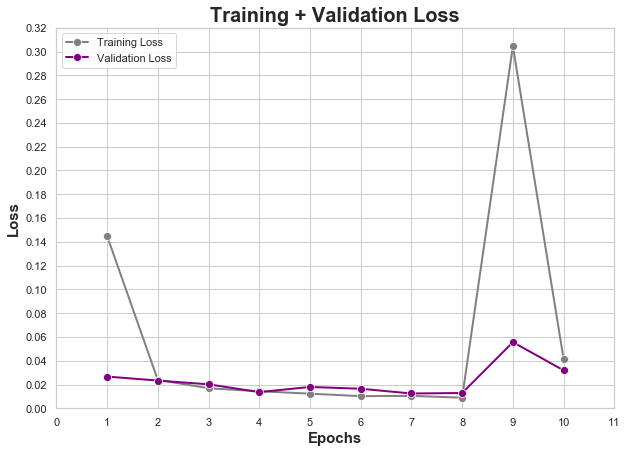

In [36]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.02))
sns.lineplot(epochs, loss_values, label='Training Loss', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_loss_values, label='Validation Loss', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Loss', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Loss', size=15, weight='bold')
plt.axis([0,11,0,.32])
plt.legend()
plt.show()
# plt.savefig('cnn_VGG19_tuned_loss.pdf')

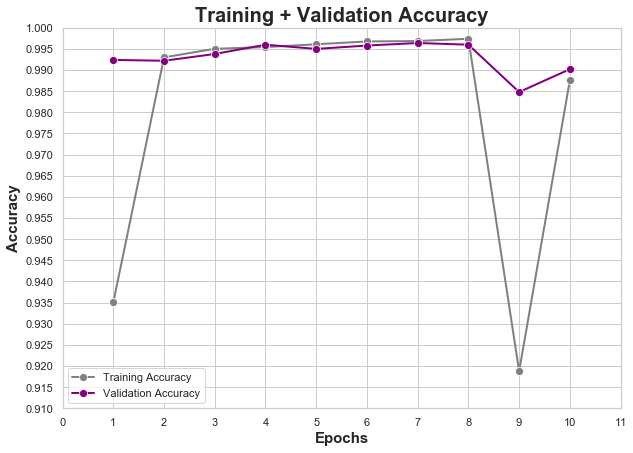

In [37]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.005))
sns.lineplot(epochs, acc_values, label='Training Accuracy', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_acc_values, label='Validation Accuracy', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Accuracy', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Accuracy', size=15, weight='bold')
plt.axis([0,11,.91,1])
plt.legend()
plt.show()
# plt.savefig('cnn_VGG19_tuned_accuracy.pdf')

In [35]:
cnn_3.save("cnn_3_tuned.h5")
print("Saved model to disk")

Saved model to disk
